# Exercise 1

In [1]:
import re
import pandas as pd
import numpy as np
from collections import defaultdict
import time

In [2]:
df=pd.read_csv("onlyhash.data",index_col=None, sep="\t",names=["user","date","hashtag"])

In [14]:
df=df[~df.user.str.startswith("#")]

In [15]:
regex = re.compile('[:,\.!?]')
df["hashtag"]=df.hashtag.apply(lambda x: regex.sub("",x))

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [17]:
user_group=df.groupby(by="user")
dif_days=df.groupby(by="date")

In [23]:
i = 1

entr_d_i = defaultdict(dict)
entropy_sys = {}

for date_i, date_data in dif_days:
    user_group = date_data.groupby(by="user")  
        
    #system entropy
    freq_meme_list = date_data.groupby(by="hashtag").count().user.values / float(len(date_data))
    entropy_sys[date_i] = -1 * sum(freq_meme_list * np.log(freq_meme_list))
    #user entropy
    for user_name, user_data in user_group:        
        n = len(user_data)
        
        if n == 1:
            entr_d_i[date_i][user_name] = 0.0
        else:    
            memes = user_data.hashtag.unique()
            if len(memes) == n:
                entr_d_i[date_i][user_name] = np.log(n)
            elif len(memes) == 1:
                entr_d_i[date_i][user_name] = 0.0
            else:
                f_u_list = user_data.groupby(by="hashtag").count().user.values / float(n)
                entr_d_i[date_i][user_name] = -1 * sum(f_u_list * np.log(f_u_list))
    i += 1

In [24]:
#average user entropy
userbased_entropy = {}
for date_i in entr_d_i:
    w1 = list(entr_d_i[date_i].values())
    userbased_entropy[date_i] = np.mean(w1)

In [25]:
#ranking days
r = [(rank,entropy_sys[key],key) for rank, key in enumerate(sorted(entropy_sys, key = entropy_sys.get), 1)]
x,y,z = zip(*r)
u_y = [userbased_entropy[k] for k in z]

Populating the interactive namespace from numpy and matplotlib


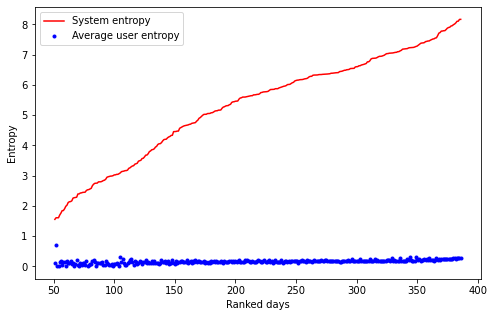

In [26]:
%pylab inline 
plt.figure(figsize=(8,5))
plt.plot(x[50:], y[50:], "r", label="System entropy")
plt.plot(x[50:], u_y[50:], ".b", label="Average user entropy")

plt.ylabel("Entropy")
plt.xlabel("Ranked days")
plt.legend();